In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math
import statistics

from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier

pd.options.display.max_rows = 1000

In [2]:
# Reading final_train dataset that will be used in modelling
final_train = pd.read_csv('./output-files/final_train.csv',index_col ='SK_ID_CURR' )
display(final_train.head())

,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,TARGET
SK_ID_CURR,,,,,,,,,,,
100002,-637.0,0.083037,0.262949,0.139376,2.0,1.0,0.0,1.0,0.0,4.0,1
100003,-1188.0,0.311267,0.622246,0.520390,0.0,1.0,0.0,0.0,0.0,1.0,0
100004,-225.0,0.640283,0.555912,0.729567,0.0,0.0,1.0,1.0,1.0,4.0,0
100006,-3039.0,0.645725,0.650442,0.540722,0.0,1.0,0.0,0.0,0.0,4.0,0
100007,-3038.0,0.639155,0.322738,0.527859,0.0,0.0,0.0,1.0,0.0,4.0,0


## Train-test Split Data

In [3]:
# Splitting the data to train and test set
X = final_train.drop('TARGET',axis=1)
y = final_train['TARGET']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape,'\n'
      'X_test shape:', X_test.shape,'\n'
      'y_train shape:', y_train.shape,'\n'
      'y_test shape:', y_test.shape)

X_train shape: (215257, 10) 
X_test shape: (92254, 10) 
y_train shape: (215257,) 
y_test shape: (92254,)


In [5]:
# Calling scaler
scaler = StandardScaler()

# Calling logistic regression model
log_reg = LogisticRegression(max_iter = 1000,class_weight='balanced',)
# Fitting the model to X_train and y_train
log_reg.fit(scaler.fit_transform(X_train),y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Model Evaluation

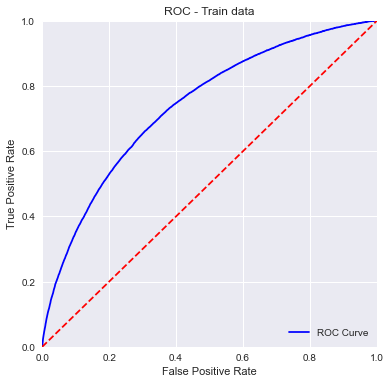

Gini = 47.6775
AUC = 0.738387665111331


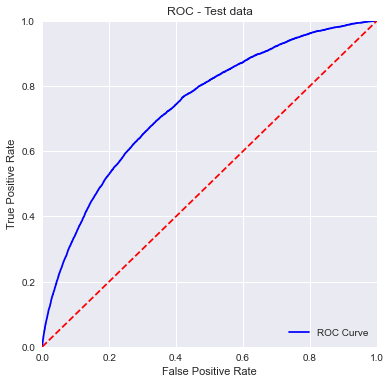

Gini = 47.6731
AUC = 0.7383654644970956


In [6]:
# Draw ROC curve for model predicting train data
roc_auc = roc_auc_score(y_train, log_reg.predict_proba(scaler.fit_transform(X_train))[:,1])
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(scaler.fit_transform(X_train))[:,1])
gini = 2*(roc_auc-0.5)*100

plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.plot(fpr, tpr,'b', label='ROC Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train data')
plt.legend(loc="lower right",fontsize='medium')
plt.savefig('./output-files/graphs-and-charts/ROC_TRAIN.png')
plt.show() 

print('Gini = %0.4f'% gini)
print('AUC =',roc_auc)


# Draw ROC curve for model predicting test data
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(scaler.fit_transform(X_test))[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(scaler.fit_transform(X_test))[:,1])
gini = 2*(roc_auc-0.5)*100

plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.plot(fpr, tpr,'b', label='ROC Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test data')
plt.legend(loc="lower right",fontsize='medium')
plt.savefig('./output-files/graphs-and-charts/ROC_TEST.png')
plt.show() 

print('Gini = %0.4f'% gini)
print('AUC =',roc_auc)

In [7]:
final_imputed_oot = pd.read_csv('./output-files/final-imputed-oot.csv',index_col='SK_ID_CURR')

In [8]:
# Change oot_data features to only final_features
X = final_imputed_oot[final_train.columns.drop('TARGET')]

# Predict the probability of application will be default using the model 
prediction = log_reg.predict_proba(scaler.fit_transform(X))

# Construct the dataframe consisted of prediction
oot_prediction = pd.DataFrame(prediction[:,1], index=X.index, columns=['TARGET'])
oot_prediction.to_csv('./output-files/prediction.csv')
oot_prediction

,TARGET
SK_ID_CURR,
100001,0.342068
100005,0.668642
100013,0.163675
100028,0.359817
100038,0.631633
...,...
456221,0.226626
456222,0.409949
456223,0.375017
